In [48]:
import urllib.parse
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime

In [49]:
api_key = 'KY1QQES2VAJB74DG'

In [50]:
base_url = "https://www.alphavantage.co/query?"

In [58]:
timeSeries = "TIME_SERIES_DAILY"
symbol = input("Enter the stock symbol: ")

Enter the stock symbol:  AAPL


In [69]:
Base_Data = f'{base_url}function={timeSeries}&symbol={symbol}&outputsize=full&apikey={api_key}'
Overview_URL = f'{base_url}function=OVERVIEW&symbol={symbol}&apikey={api_key}'

In [70]:
response = requests.get(Base_Data)

In [72]:
# Assuming response is already obtained from your API call
if response.status_code == 200:
    data = response.json()

    # Remove the "Meta Data" section
    if "Meta Data" in data:
        del data["Meta Data"]

    # Extract "Time Series (Daily)" data
    time_series_data = data["Time Series (Daily)"]

    # Convert to a list of dictionaries for easier manipulation
    processed_data = []
    for date, metrics in time_series_data.items():
        entry = {
            "date": date,
            "open": float(metrics["1. open"]),
            "high": float(metrics["2. high"]),
            "low": float(metrics["3. low"]),
            "close": float(metrics["4. close"]),
            "volume": int(metrics["5. volume"]),
        }
        processed_data.append(entry)

    processed_data.sort(key=lambda x: datetime.strptime(x["date"], "%Y-%m-%d"))

    # Print or save the processed data
    print(json.dumps(processed_data, indent=4))  # Pretty print the processed data

    Base_Data_Dataframe = pd.DataFrame(processed_data)
    Base_Data_Dataframe.to_csv("stock_data.csv", index=False)  # Save as CSV for later use
else:
    print(f"Error: {response.status_code}")

[
    {
        "date": "1999-11-01",
        "open": 80.0,
        "high": 80.69,
        "low": 77.37,
        "close": 77.62,
        "volume": 2487300
    },
    {
        "date": "1999-11-02",
        "open": 78.0,
        "high": 81.69,
        "low": 77.31,
        "close": 80.25,
        "volume": 3564600
    },
    {
        "date": "1999-11-03",
        "open": 81.62,
        "high": 83.25,
        "low": 81.0,
        "close": 81.5,
        "volume": 2932700
    },
    {
        "date": "1999-11-04",
        "open": 82.06,
        "high": 85.37,
        "low": 80.62,
        "close": 83.62,
        "volume": 3384700
    },
    {
        "date": "1999-11-05",
        "open": 84.62,
        "high": 88.37,
        "low": 84.0,
        "close": 88.31,
        "volume": 3721500
    },
    {
        "date": "1999-11-08",
        "open": 87.75,
        "high": 97.73,
        "low": 86.75,
        "close": 96.37,
        "volume": 8490400
    },
    {
        "date": "1999-11-09",
 

In [73]:
Base_Data_Dataframe

,date,open,high,low,close,volume
0,1999-11-01,80.00,80.690,77.37,77.62,2487300
1,1999-11-02,78.00,81.690,77.31,80.25,3564600
2,1999-11-03,81.62,83.250,81.00,81.50,2932700
3,1999-11-04,82.06,85.370,80.62,83.62,3384700
4,1999-11-05,84.62,88.370,84.00,88.31,3721500
...,...,...,...,...,...,...
6269,2024-10-02,225.89,227.370,223.02,226.78,32880605
6270,2024-10-03,225.14,226.805,223.32,225.67,34044158
6271,2024-10-04,227.90,228.000,224.13,226.80,37345098
6272,2024-10-07,224.50,225.690,221.33,221.69,39505354


{'Symbol': 'AAPL', 'AssetType': 'Common Stock', 'Name': 'Apple Inc', 'Description': "Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue (totalling $274.5 billion in 2020) and, since January 2021, the world's most valuable company. As of 2021, Apple is the world's fourth-largest PC vendor by unit sales, and fourth-largest smartphone manufacturer. It is one of the Big Five American information technology companies, along with Amazon, Google, Microsoft, and Facebook.", 'CIK': '320193', 'Exchange': 'NASDAQ', 'Currency': 'USD', 'Country': 'USA', 'Sector': 'TECHNOLOGY', 'Industry': 'ELECTRONIC COMPUTERS', 'Address': 'ONE INFINITE LOOP, CUPERTINO, CA, US', 'OfficialSite': 'https://www.apple.com', 'FiscalYearEnd': 'September', 'LatestQuarter': '2024-06-30', 'MarketCapitalization': '3370596958000', 'EBITDA': '131781001000', 'PERatio': '33.79', 'PEG

<Axes: xlabel='date'>

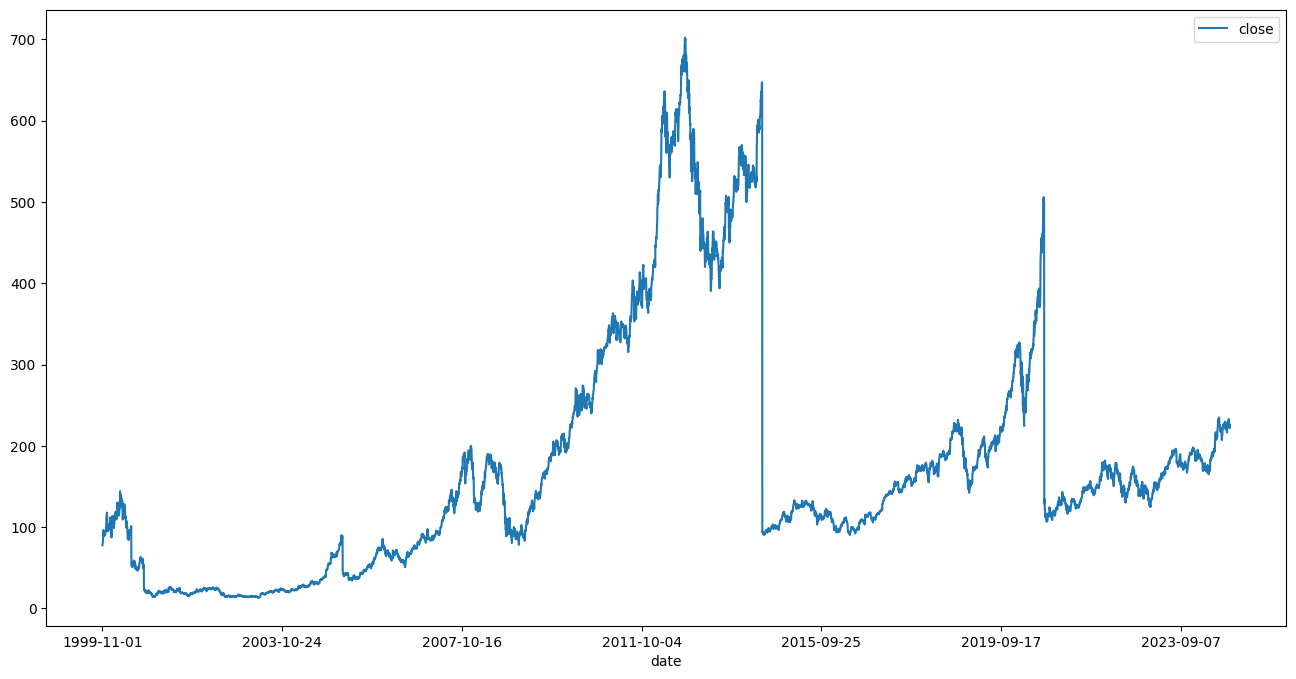

In [74]:
overview = requests.get(Overview_URL)
Overview_Data = overview.json()
print(Overview_Data)
Base_Data_Dataframe.plot(x = 'date', y = 'close', figsize = (16, 8))

In [64]:
url_Search_Ticker = f'{base_url}function=SYMBOL_SEARCH&keywords=microsoft&datatype=json&apikey={api_key}'
url_Search_Ticker

'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=microsoft&datatype=json&apikey=KY1QQES2VAJB74DG'

In [65]:
url_Globle_Market = f'{base_url}function=MARKET_STATUS&apikey={api_key}'
url_Globle_Market

'https://www.alphavantage.co/query?function=MARKET_STATUS&apikey=KY1QQES2VAJB74DG'